Importing

In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import cvzone

Defining Model with YOLO version 8 nano

In [2]:
model = YOLO('yolov8n')

In [3]:
CLASSES = model.names
CLR= [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255),
    (128, 0, 0),
    (0, 128, 0),
    (0, 0, 128),
    (128, 128, 0),
    (128, 0, 128),
    (0, 128, 128),
    (255, 128, 0),
    (255, 0, 128),
    (128, 255, 0),
    (128, 0, 255),
    (0, 128, 255),
    (255, 128, 128),
    (0, 64, 0),
    (0, 0, 64),
    (64, 64, 0),
    (64, 0, 64),
    (0, 64, 64),
    (128, 64, 0),
    (128, 0, 64),
    (64, 128, 0),
    (64, 0, 128),
    (0, 128, 64),
    (0, 64, 128),
    (64, 128, 128),
    (128, 64, 128),
    (128, 128, 64),
    (64, 64, 128),
    (128, 128, 128),
    (64, 64, 64),
    (192, 0, 0),
    (0, 192, 0),
    (0, 0, 192),
    (192, 192, 0),
    (192, 0, 192),
    (0, 192, 192),
    (192, 192, 192),
    (96, 0, 0),
    (0, 96, 0),
    (0, 0, 96),
    (96, 96, 0),
    (96, 0, 96),
    (0, 96, 96),
    (192, 96, 0),
    (192, 0, 96),
    (96, 192, 0),
    (96, 0, 192),
    (0, 192, 96),
    (0, 96, 192),
    (96, 192, 192),
    (192, 96, 192),
    (192, 192, 96),
    (96, 96, 192),
    (192, 192, 192),
    (96, 96, 96),
    (255, 64, 64),
    (64, 255, 64),
    (64, 64, 255),
    (255, 255, 64),
    (255, 64, 255),
    (64, 255, 255),
    (192, 64, 64),
    (64, 192, 64),
    (64, 64, 192),
    (192, 192, 64),
    (192, 64, 192),
    (64, 192, 192),
    (255, 192, 64),
    (255, 64, 192),
    (192, 255, 64),
    (192, 64, 255),
    (64, 192, 255),
    (255, 192, 192),
    (64, 128, 64),
    (250, 64, 250)
    
]

len(CLR)

80

Counting objects in a image

In [4]:
results  = model.predict('Test Image/img2.png' , show=True)
cv2.waitKey(0)

objects = [CLASSES[int(i)] for i in np.array(results[0].boxes.cls)] 
objects=pd.DataFrame(objects)
objects.value_counts()



image 1/1 D:\Raahim\Machine Learning\Object Detection With YOLO\Car-Counter\Test Image\img2.png: 448x640 7 persons, 6 bicycles, 5 cars, 1 traffic light, 2 stop signs, 571.8ms
Speed: 6.0ms preprocess, 571.8ms inference, 15.1ms postprocess per image at shape (1, 3, 448, 640)


0            
person           7
bicycle          6
car              5
stop sign        2
traffic light    1
Name: count, dtype: int64

Filtering Objects as per user input

In [5]:
objects = [CLASSES[int(i)] for i in np.array(results[0].boxes.cls)] 
user_input = input("Enter the desired item to filter the list: ")

filtered = [item for item in objects if item == user_input]
print( f"There are {len(filtered)} {user_input}")

Enter the desired item to filter the list:  car


There are 5 car


Counting number of anything entered by user

In [6]:
user_input = input("Enter the desired item you want to count: ")

count = 0
img = cv2.imread('Test Image/img2.png')
bg = cv2.imread('Test Image/bg.png' , cv2.IMREAD_UNCHANGED)
cvzone.overlayPNG(img , bg , (0,0))

results = model(img , show=False)
for result in results:
    for box in result.boxes:
        #xy cordinates
        x1 , y1 , x2 , y2 =  box.xyxy[0]
        x1 , y1 , x2 , y2 = int(x1),int(y1),int(x2),int(y2) 

        #confidence
        conf = math.ceil((box.conf[0]*100))/100

        #class
        cls = box.cls[0]

        if user_input =="ALL":
            cv2.rectangle(img ,(x1,y1),(x2,y2),CLR[int(cls)],3)
            cvzone.putTextRect(img, f'{CLASSES[int(cls)]} {conf}', (max(0, x1), max(0, y1-5)),scale=1.4, thickness=1, offset=4,colorT=(255, 255, 255), colorR=CLR[int(cls)])
            count = count+1
        
        elif CLASSES[int(cls)]==user_input:
            cv2.rectangle(img ,(x1,y1),(x2,y2),CLR[int(cls)],3)
            cvzone.putTextRect(img, f'{CLASSES[int(cls)]} {conf}', (max(0, x1), max(0, y1-5)),scale=1.4, thickness=1, offset=4,colorT=(255, 255, 255), colorR=CLR[int(cls)])
            count = count+1
        
        
    cv2.putText(img, f"COUNT:{count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) ,4)


cv2.imshow("Image",img)
cv2.waitKey(0)

Enter the desired item you want to count:  car



0: 448x640 7 persons, 6 bicycles, 5 cars, 2 traffic lights, 2 stop signs, 269.9ms
Speed: 10.7ms preprocess, 269.9ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


-1

(-0.5, 801.5, 542.5, -0.5)

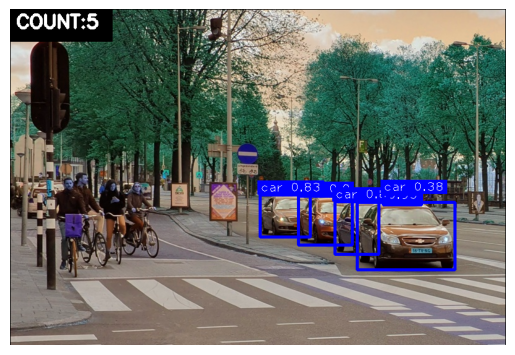

In [7]:
plt.imshow(img)
plt.axis('off')

Testing with Video

In [ ]:
user_input = input("Enter the desired item you want to count: ")
cap = cv2.VideoCapture('Test Image/house.mp4')
count = 0
bg = cv2.imread('Test Image/bg.png' , cv2.IMREAD_UNCHANGED)

#To be uncommented on for webcam i.e  cap = cv2.VideoCapture(0)
# cap.set(3,1280)
# cap.set(4,720)

while True:
    success , img = cap.read()
    result = model(img , stream=True)
    for r in result:
        cvzone.overlayPNG(img , bg , (0,0))
        boxes = r.boxes
        for box in boxes:
            x1,y1,x2,y2 = box.xyxy[0]
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2) 
            cls = int(box.cls[0])
            conf = math.ceil((box.conf[0]*100))/100

            cls = box.cls[0]

            if user_input =="ALL":
                cv2.rectangle(img ,(x1,y1),(x2,y2),CLR[int(cls)],3)
                cvzone.putTextRect(img, f'{CLASSES[int(cls)]} {conf}', (max(0, x1), max(0, y1-5)),scale=1.4, thickness=1, offset=4,colorT=(255, 255, 255), colorR=CLR[int(cls)])
                count = count+1
        
            elif CLASSES[int(cls)]==user_input:
                cv2.rectangle(img ,(x1,y1),(x2,y2),CLR[int(cls)],3)
                cvzone.putTextRect(img, f'{CLASSES[int(cls)]} {conf}', (max(0, x1), max(0, y1-5)),scale=1.4, thickness=1, offset=4,colorT=(255, 255, 255), colorR=CLR[int(cls)])
                count = count+1

        cv2.putText(img, f"COUNT:{count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) ,4)
                    
    cv2.imshow("Image",img)
    cv2.waitKey(1)



        


Enter the desired item you want to count:  car



0: 384x640 11 cars, 229.0ms
Speed: 4.1ms preprocess, 229.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 287.2ms
Speed: 15.6ms preprocess, 287.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 299.0ms
Speed: 10.3ms preprocess, 299.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 263.6ms
Speed: 0.0ms preprocess, 263.6ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 motorcycle, 236.0ms
Speed: 16.4ms preprocess, 236.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 cars, 1 motorcycle, 1 bus, 236.1ms
Speed: 15.6ms preprocess, 236.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 265.6ms
Speed: 0.0ms preprocess, 265.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 250.8ms
Speed: 15.6ms preprocess, 250.8ms inference, 0.